In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
# sns.set_context('paper', font_scale=0.73)
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

In [2]:
!echo $CONDA_DEFAULT_ENV

pytorch1.9


In [3]:
#paths
root_dir = "/home/ryan/haveibeentrainedon/models/unstealthy_scaling"
dataset_names = ["wikitext_10len", "wikitext_20len", "wikitext_40len"]
model_size = "70M"
scored_file = "scored.csv"

experiments = [f"{root_dir}/{dataset_name}/{model_size}" for dataset_name in dataset_names]
experiments

['/home/ryan/haveibeentrainedon/models/unstealthy_scaling/wikitext_10len/70M',
 '/home/ryan/haveibeentrainedon/models/unstealthy_scaling/wikitext_20len/70M',
 '/home/ryan/haveibeentrainedon/models/unstealthy_scaling/wikitext_40len/70M']

In [4]:
models = list(filter(lambda x: x[-5:] == "model", os.listdir(experiments[0])))
models = sorted(models, key = lambda x: eval(x[:-6]))
models

['1_model',
 '2_model',
 '4_model',
 '8_model',
 '16_model',
 '32_model',
 '64_model',
 '128_model',
 '256_model']

In [5]:
experiments_dfs = []
for experiment in experiments:
    model_dfs = []
    for model_type in models:
        model_dfs += [pd.read_csv(os.path.join(experiment,  model_type, scored_file), header=None)]
    experiments_dfs.append(model_dfs)
print(len(experiments_dfs))
print(len(model_dfs))

3
9


In [6]:
print(experiments_dfs[0][0].columns)

Index([0], dtype='int64')


In [7]:
x_axis = [1, 2, 4, 8, 16, 32, 64, 128, 256]
y_axises = []
for experiment_dfs in experiments_dfs:
    y_axis = []
    for model_df in experiment_dfs:
        null = model_df[0][1:]
        mean = np.log(null).mean()
        stdev = np.log(null).std()
        
        statistic = np.log(model_df[0][0])
        print(f"statistic = {statistic}, mean = {mean}, stdev = {stdev}")

        
        y_axis += [(statistic - mean) / stdev]
    y_axises.append(y_axis)
print(len(y_axises))

statistic = 10.545212729767988, mean = 10.903727040351809, stdev = 1.2996265616782252
statistic = 10.479123108358321, mean = 10.922396267892122, stdev = 1.3220078901731405
statistic = 9.995880127996465, mean = 10.892102343850548, stdev = 1.3386086475221288
statistic = 9.672489197216926, mean = 10.882675203804222, stdev = 1.3475586978492522
statistic = 9.034892054326518, mean = 10.820347978697788, stdev = 1.3605874501277855
statistic = 8.639876354591802, mean = 10.950077708869884, stdev = 1.3519676552351763
statistic = 7.023396917580779, mean = 11.028441934101986, stdev = 1.2910704721227038
statistic = 5.102428480353322, mean = 10.85977782130161, stdev = 1.2581354187222396
statistic = 3.821073748214867, mean = 10.927692225240774, stdev = 1.3025207480987469
statistic = 10.184695244548632, mean = 10.655539794168988, stdev = 0.9135810617194084
statistic = 10.233132335831339, mean = 10.64340551381687, stdev = 0.9027476937997129
statistic = 9.56262018317249, mean = 10.629104438315684, stdev 

In [ ]:
x_axis = 

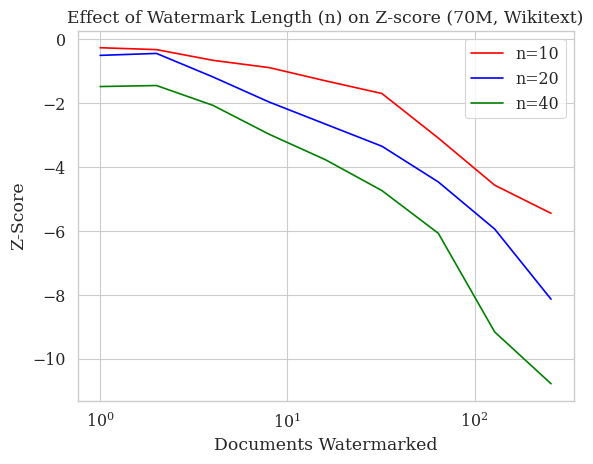

In [16]:
# Create a line plot for each set of y-values
sns.lineplot(x=x_axis, y=y_axises[0], color='red', label='n=10')
sns.lineplot(x=x_axis, y=y_axises[1], color='blue', label='n=20')
ax = sns.lineplot(x=x_axis, y=y_axises[2], color='green', label='n=40')

# Customize the plot
plt.title('Effect of Watermark Length (n) on Z-score (70M, Wikitext)')
plt.xlabel('Documents Watermarked')
plt.ylabel('Z-Score')
plt.legend()

ax.set_xscale("log")

# Show the plot
plt.show()